In [10]:
import lmfit
import operator
import numpy as np
import functools as ft
from functools import reduce

def unique_prefix(model, num):
    """

    Args:
        model (lmfit.Model): Model to be use
        num (int): Integer identifier
    """
    return 

def assign_label(index):
    """Assign a label to the muon site."""
    if index < 26:
        return chr(65 + index) 
    elif index < 52:
        return chr(65 + index - 26) + "'" 
    else:
        return chr(65 + index - 52) + "''"
    
def assign_label(index):
    """Assign an alphabetic label: A..Z, AA..AZ, BA..BZ, ..."""
    label = ""
    while True:
        index, r = divmod(index, 26)
        label = chr(65 + r) + label
        if index == 0:
            break
        index -= 1
    return label
    
def assign_prefix(index):
    """Assign a prefix to the lmfit.Model function

    Args:
        index (int): a unique integer value to create a unique prefix
    """
    return f"{assign_label(index).lower()}{index}_"

def create_model(func, index=None, independent_vars=None, param_names=None, 
                 nan_policy='raise', prefix='', name=None, **kws):
    """This create lmfit.Model() function from user-supplied model function. 

    Args:
        func (callable): Function to be wrapped.
        index (str, optional): A unique identifier. Defaults to None.
        independent_vars (:obj:`list` of :obj:`str`, optional): Arguments to `func` that are independent variables 
            (default is None).
        param_names (:obj:`list` of :obj:`str`, optional): Names of arguments to `func` that are to be made into
            parameters (default is None).
        nan_policy ({'raise', 'propagate', 'omit'}, optional): How to handle NaN and missing values 
            in data. See Notes below.
        prefix (str, optional) : Prefix used for the model. Default will be created with `index`
        name (str, optional): Name for the model. When None (default) the name is the same
            as the model function (`func`).
        **kws (dict, optional): Additional keyword arguments to pass to model function.

        Notes
        -----
        1. The model function must return an array that will be the same
        size as the data being modeled.

        2. Parameter names are inferred from the function arguments by default,
        and a residual function is automatically constructed.

        3. Specifying `independent_vars` here will explicitly name the
        independent variables for the Model.  in contrast, `param_names` is
        meant to help infer Parameter names for keyword arguments defined with
        ``**kws`` in the Model function.

        4. `nan_policy` sets what to do when a NaN or missing value is
        seen in the data. Should be one of:

           - `'raise'` : raise a `ValueError` (default)
           - `'propagate'` : do nothing
           - `'omit'` : drop missing data

        5. `prefix` prefix logic:
            1. user provides `prefix`  --> keep it
            2. user doesn't give `prefix` but gives `index` --> auto-generate `prefix`
            3. user gives neither `prefix` nor index --> leave `prefix` as ''

    Returns:
        _type_: _description_
    """

    if prefix:                    # user supplied lmfit type-one
        pass
    else:
        if index is not None:     # user gave index --> generate automatic prefix
            prefix = assign_prefix(index)
        else:
            prefix = ''           # leave it empty, lmfit will auto-name it

    return lmfit.Model(
        func,
        name=name,
        prefix=prefix,
        nan_policy=nan_policy,
        param_names=param_names,
        independent_vars=independent_vars,
        )

def prepare_params(item, model):
    
    return 

def create_composite_model(def_list):
    parameters = lmfit.Parameters()
    return

def create_composite_model(model_lst, op_list):
    op_map = {
        '+': operator.add,
        '*': operator.mul,
        '-': operator.sub,
        '/': operator.truediv,
    }

    model = reduce(
        lambda x, y: op_map[y[1]](x, y[0]),
        zip(model_lst[1:], op_list),
        model_lst[0]
    )
    return model

def residual_mlmfit(
    params, 
    data,
    func
):
    """Calculate total residual for fits of func lineshape to multi data sets.

    Parameters:
    ----------
    params (lmfit.Parameters): initial parameters for the model.
    data (nd.array) : numpy array of data of xdata=data[:,0] and ydata=data[:,1:] values.
    func (callable) : Model function to be minimized for multidatasets. 
    """
    
    xdata = data[:,0]
    ydata = data[:,1:]
    resid = np.zeros_like(ydata)
    _, ndata = resid.shape

    # make residual per data set
    for i in range(ndata):
        resid[:,i] = ydata[:,i] - func(params, i, xdata)

    # now flatten this to a 1D array, as minimize() needs
    return resid.flatten()


def _generate_residues(function, data, params, extra_param=None):
    """
    Generate a single residue  (used by global_fit)
    """
    xdat = data[:,0]
    ydat = data[:,1:]
    resid = np.zeros_like(ydat)

    ndata, nx = resid.shape

    # make residual per data set
    for i in range(nx):
        if extra_param is not None:
            resid[:, i] = ydat[:, i] - function(params, i, xdat, extra_param)
        else:
            resid[:, i] = ydat[:, i] - function(params, i, xdat)
    return resid




In [3]:
def myfunc(x, amplitude=1, center=0, sigma=1):
    # function definition, for now just ``pass``
    pass

def decay(x, tau, amplitude):
   return amplitude*np.exp(-x/tau)

def gaussian(x, amp, cen, wid):
    return amplitude * np.exp(-(x-cen)**2 / wid)

def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (np.sqrt(2*np.pi) * wid)) * np.exp(-(x-cen)**2 / (2*wid**2))


# lmfit.Model(myfunc, prefix='g_')
lmfit.Model(myfunc)

lmfit.models.GaussianModel.prefix

[assign_label(i) for i in range(10)]

[assign_prefix(i) for i in range(10)]
assign_label(702).lower() # AAA
assign_prefix(0)

create_model(myfunc, index=0, prefix='').prefix


theory_block = [
    {
        'func': myfunc,
        'init_params' : {
            'amplitude': {'value':0.0, 'vary':True, 'min':-np.inf, 'max':+np.inf},
            'center': {'value':0, },
            'sigma': {'value':0, },
            # The parameter attribute definitions are:
            # value (float): Numerical Parameter value (default is 0)
            # vary (bool): Whether the Parameter is varied during a fit (default is True).
            # min (float): Lower bound for value (default is -numpy.inf, no lower bound).
            # max (float): Upper bound for value (default is +numpy.inf, no upper bound).
            # expr (str): Mathematical expression used to constrain the value during the fit (default is '')
        },
        'global_params': None or  []  # list of str
    },
]

params = lmfit.Parameters()

i=0
func = theory_block[i]['func']
item = theory_block[i]['init_params']
m = create_model(func, index=i)
par = lmfit.Parameters()
for name, par_dict in item.items():
    print(name, par_dict)
    # par = m.make_params(f"{name}", value=0)
    par.add(
        # f"{}{name}_{i}" if m.prefix:else f"{name}_{i}", 
        f"{m.prefix}{name}_{i+1}" if m.prefix else f"{name}_{i+1}",
        value=par_dict.get('value', 0), 
        vary=par_dict.get('vary', True),
        min=par_dict.get('min', -np.inf),
        max=par_dict.get('max', +np.inf),
    )


m
par 

params.update(par)
params
# if m.prefix:
#     print(m.prefix)

amplitude {'value': 0.0, 'vary': True, 'min': -inf, 'max': inf}
center {'value': 0}
sigma {'value': 0}


name,value,initial value,min,max,vary
a0_amplitude_1,0.00000000,0.0,-inf,inf,True
a0_center_1,0.00000000,0,-inf,inf,True
a0_sigma_1,0.00000000,0,-inf,inf,True


[[Model]]
    ((Model(exponential, prefix='a0_') + Model(gaussian, prefix='b1_')) + Model(gaussian, prefix='c2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 55
    # data points      = 250
    # variables        = 8
    chi-square         = 1247.52821
    reduced chi-square = 5.15507524
    Akaike info crit   = 417.864631
    Bayesian info crit = 446.036318
    R-squared          = 0.99648654
[[Variables]]
    a0_amplitude:  99.0183279 +/- 0.53748636 (0.54%) (init = 100)
    a0_decay:      90.9508831 +/- 1.10310756 (1.21%) (init = 100)
    b1_amplitude:  4257.77390 +/- 42.3837614 (1.00%) (init = 2000)
    b1_center:     107.030957 +/- 0.15006863 (0.14%) (init = 100)
    b1_sigma:      16.6725785 +/- 0.16048197 (0.96%) (init = 10)
    c2_amplitude:  2493.41719 +/- 36.1696382 (1.45%) (init = 2000)
    c2_center:     153.270104 +/- 0.19466739 (0.13%) (init = 150)
    c2_sigma:      13.8069455 +/- 0.18680106 (1.35%) (init = 10)
[[Correlations]] 
  +------

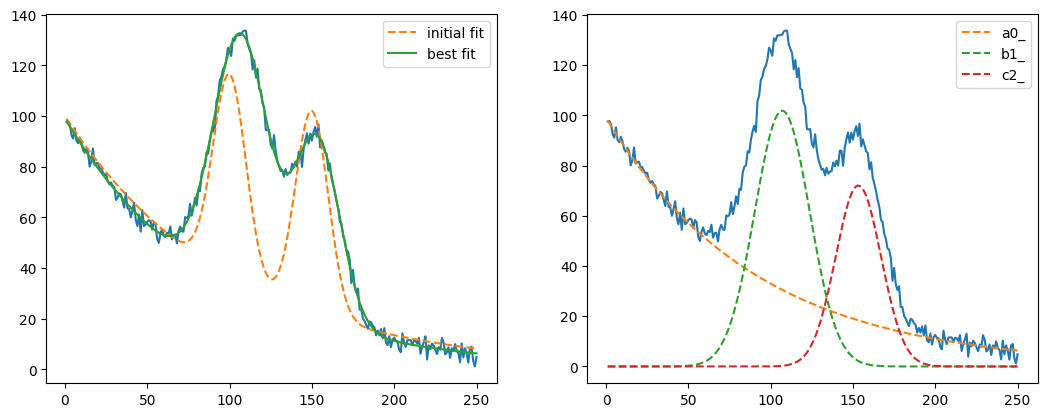

((Model(exponential, prefix='a0_') + Model(gaussian, prefix='b1_')) + Model(gaussian, prefix='c2_'))

In [4]:
"""Basic model lineshapes and distribution functions."""

from numpy import (arctan, copysign, cos, exp, isclose, isnan, log, log1p,
                   maximum, minimum, pi, real, sign, sin, sqrt, where)
from scipy.special import betaln as betalnfcn
from scipy.special import erf, erfc
from scipy.special import gamma as gamfcn
from scipy.special import loggamma as loggammafcn
from scipy.special import wofz

log2 = log(2)
s2pi = sqrt(2*pi)
s2 = sqrt(2.0)
# tiny had been numpy.finfo(numpy.float64).eps ~=2.2e16.
# here, we explicitly set it to 1.e-15 == numpy.finfo(numpy.float64).resolution
tiny = 1.0e-15

functions = ('gaussian', 'gaussian2d', 'lorentzian', 'voigt',
             'pvoigt', 'moffat', 'pearson4', 'pearson7',
             'breit_wigner', 'damped_oscillator', 'dho', 'logistic',
             'lognormal', 'students_t', 'expgaussian', 'doniach',
             'skewed_gaussian', 'skewed_voigt',
             'thermal_distribution', 'bose', 'fermi', 'step',
             'rectangle', 'exponential', 'powerlaw', 'linear',
             'parabolic', 'sine', 'expsine', 'split_lorentzian')


import os
import lmfit
import operator
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

def not_zero(value):
    """Return value with a minimal absolute size of tiny, preserving the sign.

    This is a helper function to prevent ZeroDivisionError's.

    Parameters
    ----------
    value : scalar
        Value to be ensured not to be zero.

    Returns
    -------
    scalar
        Value ensured not to be zero.

    """
    return float(copysign(max(tiny, abs(value)), value))


def gaussian(x, amplitude=1.0, center=0.0, sigma=1.0):
    """Return a 1-dimensional Gaussian function.

    gaussian(x, amplitude, center, sigma) =
        (amplitude/(s2pi*sigma)) * exp(-(1.0*x-center)**2 / (2*sigma**2))

    """
    return ((amplitude/(max(tiny, s2pi*sigma)))
            * exp(-(1.0*x-center)**2 / max(tiny, (2*sigma**2))))


def exponential(x, amplitude=1, decay=1):
    """Return an exponential function.

    exponential(x, amplitude, decay) = amplitude * exp(-x/decay)

    """
    decay = not_zero(decay)
    return amplitude * exp(-x/decay)


def powerlaw(x, amplitude=1, exponent=1.0):
    """Return the powerlaw function.

    powerlaw(x, amplitude, exponent) = amplitude * x**exponent

    """
    return amplitude * x**exponent


def linear(x, slope=1.0, intercept=0.0):
    """Return a linear function.

    linear(x, slope, intercept) = slope * x + intercept

    """
    return slope * x + intercept



function_block = [
    {
        'func_name': exponential,
        'init_params' : {
            'amplitude': {'value':100.0, 'vary':True, 'min':-np.inf, 'max':+np.inf},
            'decay': {'value':100, },
        },
        # 'global_params': None or  []  # list of str
    },
    {
        'func_name': gaussian,
        'init_params' : {
            'amplitude': {'value':2000.0, 'vary':True, 'min':-np.inf, 'max':+np.inf},
            'center': {'value':100, },
            'sigma': {'value':10, },
        },
        # 'global_params': None or  []  # list of str
    },
    {
        'func_name': gaussian,
        'init_params' : {
            'amplitude': {'value':2000.0, 'vary':True, 'min':-np.inf, 'max':+np.inf},
            'center': {'value':150, },
            'sigma': {'value':10, },
        },
        # 'global_params': None or  []  # list of str
    },
]
    # The parameter attribute definitions are:
    # value (float): Numerical Parameter value (default is 0)
    # vary (bool): Whether the Parameter is varied during a fit (default is True).
    # min (float): Lower bound for value (default is -numpy.inf, no lower bound).
    # max (float): Upper bound for value (default is +numpy.inf, no upper bound).
    # expr (str): Mathematical expression used to constrain the value during the fit (default is '')

THEORY_BLOCK = {
    'functions': function_block,
    'functions_operators': ['+', '+'],

}

functions = THEORY_BLOCK['functions']
func_op_list = THEORY_BLOCK['functions_operators']
func_lst = []
model_list = []

params = lmfit.Parameters()
for i, f in enumerate(functions):
    func = functions[i]['func_name']
    item = functions[i]['init_params']
    m = create_model(func, index=i)

    par = lmfit.Parameters()
    for name, par_dict in item.items():
        # print(name, par_dict)
        # par = m.make_params(f"{name}", value=0)
        par.add(
            # f"{}{name}_{i}" if m.prefix:else f"{name}_{i}", 
            # f"{m.prefix}{name}_{i+1}" if m.prefix else f"{name}_{i+1}",
            f"{m.prefix}{name}" if m.prefix else f"{name}",
            value=par_dict.get('value', 0), 
            vary=par_dict.get('vary', True),
            min=par_dict.get('min', -np.inf),
            max=par_dict.get('max', +np.inf),
        )
    func_lst.append(func)
    model_list.append(m)
    params.update(par)

if func_op_list:
    mod = create_composite_model(model_list, func_op_list)

dpath='./data'  # data path

# --- Load data (skip header) ---
file='NIST_Gauss2.dat' # data
file=os.path.join(
    dpath,
    file
)

dat = np.loadtxt(file)
x = dat[:, 1]
y = dat[:, 0]


init = mod.eval(params, x=x)
out = mod.fit(y, params, x=x)

print(out.fit_report(correl_mode='table'))

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y)
axes[0].plot(x, init, '--', label='initial fit')
axes[0].plot(x, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=x)
axes[1].plot(x, y)
for k in comps.keys():
    axes[1].plot(x, comps[k], '--', label=k)
# axes[1].plot(x, comps['c1_'], '--', label='Exponential component')
# axes[1].plot(x, comps['c2_'], '--', label='Gaussian component 1')
# axes[1].plot(x, comps['c3_'], '--', label='Gaussian component 2')
axes[1].legend()

plt.show()

# m
# par 

# params.update(par)
params
mod

['amplitude', 'center', 'sigma']


name,value,initial value,min,max,vary
c2_amplitude_1,2493.41719,2493.41719,-inf,inf,True
c2_center_1,153.270104,153.270104,-inf,inf,True
c2_sigma_1,13.8069455,13.8069455,-inf,inf,True


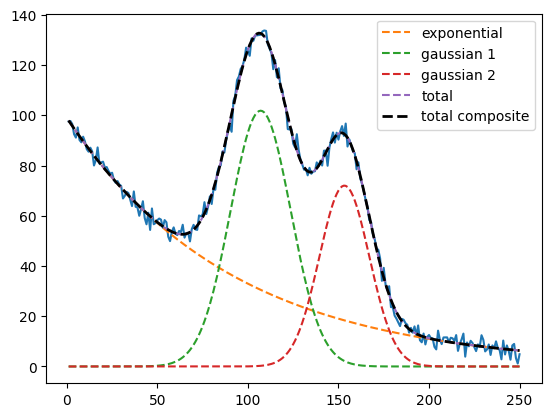

In [18]:
import inspect

def _evaluate_function(function, xdat, params, i, prefix=None):
    # params[f'{}_{i+1}']
    ###  match function parameter names with the params in accordance
    return function(xdat)

def _evaluate_function(function, xdat, params, i):
    # params[f'{}_{i+1}']
    ###  match function parameter names with the params in accordance
    return function(xdat)

def _evaluate_function(function, xdat, params, prefix, i):
    # Get ordered function parameters
    fn_pars = list(inspect.signature(function).parameters.keys())

    # First parameter is the independent variable name
    xname = fn_pars[0]

    # Remaining parameters are the function arguments
    argnames = fn_pars[1:]

    # Build argument dict for the function
    # Example: "amplitude" → "b1_amplitude_1"
    kwargs = {
        name: params[f"{prefix}{name}_{i}"].value
        for name in argnames
    }

    # Call the function with correct argument order
    return function(xdat, **kwargs)

def _evaluate_function(function, xdat, params, prefix, i, kws=None):

    if kws is None:
        kws = {}

    # Get ordered function parameters
    fn_pars = list(inspect.signature(function).parameters.keys())

    # First parameter is the x variable name
    xname = fn_pars[0]

    # Remaining parameters
    argnames = fn_pars[1:]

    kwargs = {}

    for name in argnames:
        # Case 1: name is in lmfit parameter set → pull from params
        param_key = f"{prefix}{name}_{i}"
        if param_key in params:
            kwargs[name] = params[param_key].value

        # Case 2: name is in extra kwargs (fixed parameters)
        elif name in kws:
            kwargs[name] = kws[name]

        # Case 3: leave it alone; function will handle default value
        else:
            pass  # optional default parameter not provided

    # Evaluate function safely
    return function(xdat, **kwargs)



def fun(x, a, b, c=10):
    pass

# res = list(inspect.signature(fun).parameters.keys())
# res = list(inspect.signature(fun).parameters)
# print(res)

parnames = list(inspect.signature(gaussian).parameters.keys())
independent_vars = parnames[0]
parnames.remove(independent_vars)
print(parnames)

par = lmfit.Parameters()

par.add('b1_amplitude_1', value=0.1)
par.add('b1_center_1', value=0.2)
par.add('b1_sigma_1', value=0.3)

list(par.keys())

dpath='./data'  # data path

# --- Load data (skip header) ---
file='NIST_Gauss2.dat' # data
file=os.path.join(
    dpath,
    file
)

dat = np.loadtxt(file)
x = dat[:, 1]
y = dat[:, 0]

plt.plot(x, y)

    # a0_amplitude:  99.0183279 +/- 0.53748636 (0.54%) (init = 100)
    # a0_decay:      90.9508831 +/- 1.10310756 (1.21%) (init = 100)
    # b1_amplitude:  4257.77390 +/- 42.3837614 (1.00%) (init = 2000)
    # b1_center:     107.030957 +/- 0.15006863 (0.14%) (init = 100)
    # b1_sigma:      16.6725785 +/- 0.16048197 (0.96%) (init = 10)
    # c2_amplitude:  2493.41719 +/- 36.1696382 (1.45%) (init = 2000)
    # c2_center:     153.270104 +/- 0.19466739 (0.13%) (init = 150)
    # c2_sigma:      13.8069455 +/- 0.18680106 (1.35%) (init = 10)

res = []
params = lmfit.Parameters()

par = lmfit.Parameters()
par.add('a0_amplitude_1', value=99.0183279)
par.add('a0_decay_1', value=90.9508831)
params.update(par)
y1 = _evaluate_function(
    exponential, 
    x, 
    params, 
    'a0_', 
    1
    )
res.append(y1)
plt.plot(x, y1, '--', label='exponential')

par = lmfit.Parameters()
par.add('b1_amplitude_1', value=4257.77390)
par.add('b1_center_1', value=107.030957)
par.add('b1_sigma_1', value=16.6725785)
params.update(par)
y2 = _evaluate_function(
    gaussian, 
    x, 
    params, 
    'b1_', 
    1
    )
res.append(y2)
plt.plot(x, y2, '--', label='gaussian 1')

par = lmfit.Parameters()
par.add('c2_amplitude_1', value=2493.41719)
par.add('c2_center_1', value=153.270104)
par.add('c2_sigma_1', value=13.8069455)
params.update(par)
y3 = _evaluate_function(
    gaussian, 
    x, 
    params, 
    'c2_', 
    1
    )
res.append(y3)
plt.plot(x, y3, '--', label='gaussian 2')

plt.plot(x, y1+y2+y3, '--', label='total')

op_map = {
    '+': operator.add,
    '-': operator.sub,
    '*': operator.mul,
    '/': operator.truediv,
}

op_list = ['+', '+']
composite_res = ft.reduce(
    lambda x, y: op_map[y[1]](x, y[0]),
    zip(res[1:], op_list),
    res[0]
)

plt.plot(x, composite_res, '--', color='k', lw=2, label='total composite')

plt.legend()

par


In [6]:
function_block = [
    {
        'func_name': exponential,
        'init_params' : {
            'amplitude': {'value':100.0, 'vary':True, 'min':-np.inf, 'max':+np.inf},
            'decay': {'value':100, },
        },
        # 'global_params': None or  []  # list of str
    },
    {
        'func_name': gaussian,
        'init_params' : {
            'amplitude': {'value':2000.0, 'vary':True, 'min':-np.inf, 'max':+np.inf},
            'center': {'value':100, },
            'sigma': {'value':10, },
        },
        # 'global_params': None or  []  # list of str
    },
    {
        'func_name': gaussian,
        'init_params' : {
            'amplitude': {'value':2000.0, 'vary':True, 'min':-np.inf, 'max':+np.inf},
            'center': {'value':150, },
            'sigma': {'value':10, },
        },
        # 'global_params': None or  []  # list of str
    },
]
    # The parameter attribute definitions are:
    # value (float): Numerical Parameter value (default is 0)
    # vary (bool): Whether the Parameter is varied during a fit (default is True).
    # min (float): Lower bound for value (default is -numpy.inf, no lower bound).
    # max (float): Upper bound for value (default is +numpy.inf, no upper bound).
    # expr (str): Mathematical expression used to constrain the value during the fit (default is '')

THEORY_BLOCK = {
    'functions': function_block,
    'functions_operators': ['+', '+'],

}

functions = THEORY_BLOCK['functions']
func_op_lst = THEORY_BLOCK['functions_operators']
func_lst = []

params = lmfit.Parameters()

idx=0
for i, f in enumerate(functions):
    func = functions[i]['func_name']
    item = functions[i]['init_params']

    par = lmfit.Parameters()
    for name, par_dict in item.items():
        # print(name, par_dict)
        par.add(
            # f"{}{name}_{i}" if m.prefix:else f"{name}_{i}", 
            # f"{m.prefix}{name}_{i+1}" if m.prefix else f"{name}_{i+1}",
            # f"{m.prefix}{name}" if m.prefix else f"{name}",

            f"c{i+1}_{name}_{idx+1}",
            value=par_dict.get('value', 0), 
            vary=par_dict.get('vary', True),
            min=par_dict.get('min', -np.inf),
            max=par_dict.get('max', +np.inf),
        )
    func_lst.append(func)
    params.update(par)

print(func_lst)
params


[<function exponential at 0x7cae947a84a0>, <function gaussian at 0x7cae297060c0>, <function gaussian at 0x7cae297060c0>]


name,value,initial value,min,max,vary
c1_amplitude_1,100.000000,100.0,-inf,inf,True
c1_decay_1,100.000000,100,-inf,inf,True
c2_amplitude_1,2000.00000,2000.0,-inf,inf,True
c2_center_1,100.000000,100,-inf,inf,True
c2_sigma_1,10.0000000,10,-inf,inf,True
c3_amplitude_1,2000.00000,2000.0,-inf,inf,True
c3_center_1,150.000000,150,-inf,inf,True
c3_sigma_1,10.0000000,10,-inf,inf,True


In [7]:
from functools import reduce

nums = [1, 2, 3, 4, 5]
ops  = ['*', '+', '*', '+']     # same length - 1

def apply_op(a, b, op):
    return eval(f"{a}{op}{b}")

result = reduce(lambda x, y: apply_op(x, y[0], y[1]),
                zip(nums[1:], ops),
                nums[0])

print(result)


25


In [8]:
from functools import reduce
import operator

nums = [1, 2, 3, 4]
symbols = ['*', '+', '*']

op_map = {
    '+': operator.add,
    '*': operator.mul,
}

result = reduce(
    lambda x, y: op_map[y[1]](x, y[0]),
    zip(nums[1:], symbols),
    nums[0]
)

print(result)


20
